In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [18]:
# Importing dataset - the generated simulator data
data = pd.read_csv('./data/telemetries.csv', delimiter=",")
data.head()

,container_id,measurement_time,product_id,temperature,target_temperature,ambiant_temperature,kilowatts,time_door_open,content_type,defrost_cycle,oxygen_level,nitrogen_level,humidity_level,carbon_dioxide_level,vent_1,vent_2,vent_3,maintenance_required
0,C01,2019-09-25 02:32:33.573934,P02,6.186245,6,18.393516,4.199601,0.488949,2,3,19.702701,-0.786062,0.880533,4.613894,True,True,True,0
1,C01,2019-09-25 02:37:33.573934,P02,6.048350,6,19.700940,1.016945,-0.593738,2,3,22.006098,0.368766,0.094169,5.197629,True,True,True,0
2,C01,2019-09-25 02:42:33.573934,P02,6.369165,6,21.409900,2.514134,0.991740,2,5,21.163197,1.362561,2.300261,4.594263,True,True,True,0
3,C01,2019-09-25 02:47:33.573934,P02,6.160074,6,18.592919,1.656024,1.289932,2,6,19.912371,0.562261,1.929083,5.576745,True,True,True,0
4,C01,2019-09-25 02:52:33.573934,P02,7.794491,6,21.652411,3.055000,-0.572670,2,3,19.561116,0.312373,1.173989,3.140737,True,True,True,0


In [19]:
# Convert dataset into array for the independent variables (features)
X = np.asarray(data[['temperature','target_temperature','ambiant_temperature','oxygen_level','carbon_dioxide_level','humidity_level','nitrogen_level','vent_1','vent_2','vent_3','kilowatts','content_type','time_door_open','defrost_cycle']])
X[0:5]

array([[6.1862445981284475, 6, 18.39351608289854, 19.702700853834408,
        4.613894050620417, 0.8805330785019508, -0.7860616742956061, True,
        True, True, 4.199600943572446, 2, 0.4889492546225978, 0, 3],
       [6.048349859364957, 6, 19.700939858461147, 22.00609794986054,
        5.197628693813755, 0.09416946273320814, 0.3687663885371372, True,
        True, True, 1.0169450543361922, 2, -0.5937376265635459, 0, 3],
       [6.369165267938207, 6, 21.40990035369155, 21.163197304339914,
        4.59426338168222, 2.300260562152792, 1.3625605808523396, True,
        True, True, 2.5141340338482867, 2, 0.9917395739148565, 0, 5],
       [6.160074155577716, 6, 18.5929192713, 19.912371355928077,
        5.576745136569485, 1.9290829887069596, 0.56226079163992, True,
        True, True, 1.6560237367142088, 2, 1.289932360339538, 0, 6],
       [7.794491307207923, 6, 21.652410502456792, 19.56111560733107,
        3.1407369336004294, 1.1739892643094396, 0.31237271732224386,
        True, True, 

In [20]:
# Convert dataset into array for the dependent (objective) variables
y = np.asarray(data['maintenance_required'])
y [0:5]

array([0, 0, 0, 0, 0])

In [21]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.23338774,  0.        , -1.59636309, -1.26844752,  0.18744977,
         0.08172472, -1.56589884,  0.        ,  0.        ,  0.        ,
         1.43135687,  0.        , -0.49740292, -0.14285714, -1.37363949],
       [ 0.09482886,  0.        , -0.27176769,  1.0863064 ,  0.5029603 ,
        -0.69714175, -0.43587874,  0.        ,  0.        ,  0.        ,
        -1.41169562,  0.        , -1.60045856, -0.14285714, -1.37363949],
       [ 0.41718941,  0.        ,  1.45963819,  0.22461234,  0.17683933,
         1.4879166 ,  0.53656681,  0.        ,  0.        ,  0.        ,
        -0.0742633 ,  0.        ,  0.01484648, -0.14285714,  0.44094372],
       [ 0.20709126,  0.        , -1.39434095, -1.05410218,  0.707874  ,
         1.12027781, -0.24654098,  0.        ,  0.        ,  0.        ,
        -0.84080945,  0.        ,  0.31864921, -0.14285714,  1.34823533],
       [ 1.8493802 ,  0.        ,  1.70533346, -1.41318957, -0.60879657,
         0.37238311, -0.49106097,  0.        , 

In [22]:
## split the dataset into train and test to estiamte model accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 15) (1600,)
Test set: (400, 15) (400,)


In [23]:
## As we are trying to acheive a binary classification, we use Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
## Predict using the trained LR model
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [25]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.87478818, 0.12521182],
       [0.88601073, 0.11398927],
       [0.87812541, 0.12187459],
       [0.87835725, 0.12164275],
       [0.88383756, 0.11616244],
       [0.87646515, 0.12353485],
       [0.86549291, 0.13450709],
       [0.89255972, 0.10744028],
       [0.86761203, 0.13238797],
       [0.88983733, 0.11016267],
       [0.87733278, 0.12266722],
       [0.87987191, 0.12012809],
       [0.8772017 , 0.1227983 ],
       [0.87714744, 0.12285256],
       [0.88567439, 0.11432561],
       [0.87797083, 0.12202917],
       [0.87568959, 0.12431041],
       [0.87569849, 0.12430151],
       [0.88301858, 0.11698142],
       [0.8990911 , 0.1009089 ],
       [0.86317438, 0.13682562],
       [0.8742425 , 0.1257575 ],
       [0.78633029, 0.21366971],
       [0.88439378, 0.11560622],
       [0.88130942, 0.11869058],
       [0.88182982, 0.11817018],
       [0.88648684, 0.11351316],
       [0.86518587, 0.13481413],
       [0.87661047, 0.12338953],
       [0.89501678, 0.10498322],
       [0.

In [26]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

1.0

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[ 10   0]
 [  0 390]]
[[ 10   0]
 [  0 390]]


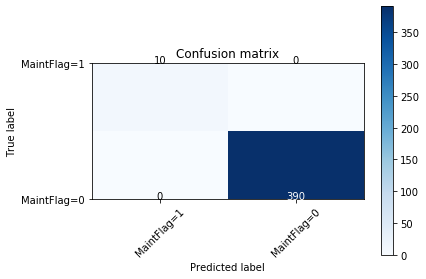

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MaintFlag=1','MaintFlag=0'],normalize= False,  title='Confusion matrix')

In [29]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00        10

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [30]:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)


0.12913446106246596

In [31]:
import pickle

#serializing our model to a file called model_logistic_regression.pkl
pickle.dump(LR, open("model_logistic_regression.pkl","wb"))